<a href="https://colab.research.google.com/github/Coralain10/wv71_tf_202010279_202017572_201319550/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de adyacencia entre nodos vecinos

In [1]:
'''
56 57 58 59 60 61 62 63
48 49 50 51 52 53 54 55
40 41 42 43 44 45 46 47
32 33 34 35 36 37 38 39
24 25 26 27 28 29 30 31
16 17 18 19 20 21 22 23
 8  9 10 11 12 13 14 15
 0  1  2  3  4  5  6  7

xy
07 17 27 37 47 57 67 77
06 16 26 36 46 56 66 76
05 15 25 35 45 55 65 75
04 14 24 34 44 54 64 74
03 13 23 33 43 53 63 73
02 12 22 32 42 52 62 72
01 11 21 31 41 51 61 71
00 10 20 30 40 50 60 70

32 => 3+2*8
ngrafo = y*ancho + x

00 | 01 10 => 0 | 1 8
0+1<n 0-1>0 0+ancho<n 0-ancho>0 

32 | 33 31 22 42 => 19 | 27 11 18 20
19+1<n 19-1>0 19+ancho<n 19-ancho>0 

77 | 76 67 => 63 | 55 62
63+1<n 63-1>0 63+ancho<n 63-ancho>0 
'''
''

''

## Función para unir nodos vecinos
* Une los vecinos de abajo, izquierda, derecha y arriba
* Los nodos se cuentan desde la esquina inferior izquierda hacia la esquina superior derecha.
* Se leen de izquierda a derecha y de abajo a arriba.

In [2]:
def setGraphByWH(w,h): # width height
  n = w*h
  G = [ [] for _ in range(n) ]
  for i, u in enumerate(G):
    if i - w >= 0 : u.append(i - w)
    if i - 1 >= 0 : u.append(i - 1)
    if i + 1  < n : u.append(i + 1)
    if i + w  < n : u.append(i + w)
  return G

def setGraphByWH2(w,h): #v2 # width height
  n = w*h
  G = []
  for i in range(n):
    u = []
    if i - w >= 0 : u.append(i - w)
    if i - 1 >= 0 : u.append(i - 1)
    if i + 1  < n : u.append(i + 1)
    if i + w  < n : u.append(i + w)
    G.append(u)
  return G

In [3]:
#%timeit setGraphByWH(7000,7000)
#%timeit setGraphByWH2(7000,7000) #7000 x 7100 no
G = setGraphByWH(1000,1000)

## Funcion para diferenciar los nodos (v1)
* Todos los nodos inician con x, y 
* Los nodos de distribución terminan en D
* Los nodos de entrega terminan en E

In [4]:
# width height delivery_points[(x,y)], distribution_points[(x,y)] 
# Solo modificar los labels
def setLabelsByPoints(G,deps,dips,w=None):
  n = len(G)
  if w == None: w = int(n**(1/2)) #10 | 2,1
  labels = [f'{i%w},{i//w}' for i in range(n)] #x,y
  for v in deps:
    x, y = v[0], v[1]
    pos = y*w + x
    labels[pos] = f'{x},{y} E'
  for v in dips:
    x, y = v[0], v[1]
    pos = y*w + x
    labels[pos] = f'{x},{y} D'
  return labels

## Funcion para diferenciar los nodos (v2)
* **w** es el ancho de la ciudad.
* La posición **i** del nodo en x,y es $i = y \cdot w + x$ .
* La posición **(x,y)** del nodo i se encuentra en $x = i\%w $ y en $y = i//w$.
* Solo se consideran los nodos de distribución y de entrega.

In [14]:
def getNodesByXYs(xyl, w): #xylist [(x,y),(x,y),...]
  return [xy[1]*w + xy[0] for xy in xyl]

def getXYsByNodes(nl, w):
  return [ (i%w , i//w) for i in nl ]

# Agregar la información de los datasets
* [x] Agregar la información de dataset de almacenes.csv.
* [x] Agregar la información de dataset de puntos_entrega.csv.

In [26]:
!wget https://raw.githubusercontent.com/Coralain10/wv71_tf_202010279_202017572_201319550/main/dataset/almacenes.csv -P dataset/
!wget https://raw.githubusercontent.com/Coralain10/wv71_tf_202010279_202017572_201319550/main/dataset/puntos_entrega.csv -P dataset/

--2021-10-27 02:37:08--  https://raw.githubusercontent.com/Coralain10/wv71_tf_202010279_202017572_201319550/main/dataset/almacenes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 668 [text/plain]
Saving to: ‘dataset/almacenes.csv’

almacenes.csv       100%[===================>]     668  --.-KB/s    in 0s      

2021-10-27 02:37:08 (37.0 MB/s) - ‘dataset/almacenes.csv’ saved [668/668]

--2021-10-27 02:37:08--  https://raw.githubusercontent.com/Coralain10/wv71_tf_202010279_202017572_201319550/main/dataset/puntos_entrega.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP reques

In [27]:
def fileXYtoLst(fname):
  xys = []
  with open(fname) as f:
    for line in f:
      xys.append( tuple( map(int,line.strip().split(','))) )
  return xys

side = 1000 #ancho y alto de la ciudad
almacenes_xys = fileXYtoLst("dataset/almacenes.csv")
entrega_xys = fileXYtoLst("dataset/puntos_entrega.csv")

In [28]:
almacenes_nodes = getNodesByXYs(almacenes_xys, side)
entrega_nodes = getNodesByXYs(entrega_xys, side)

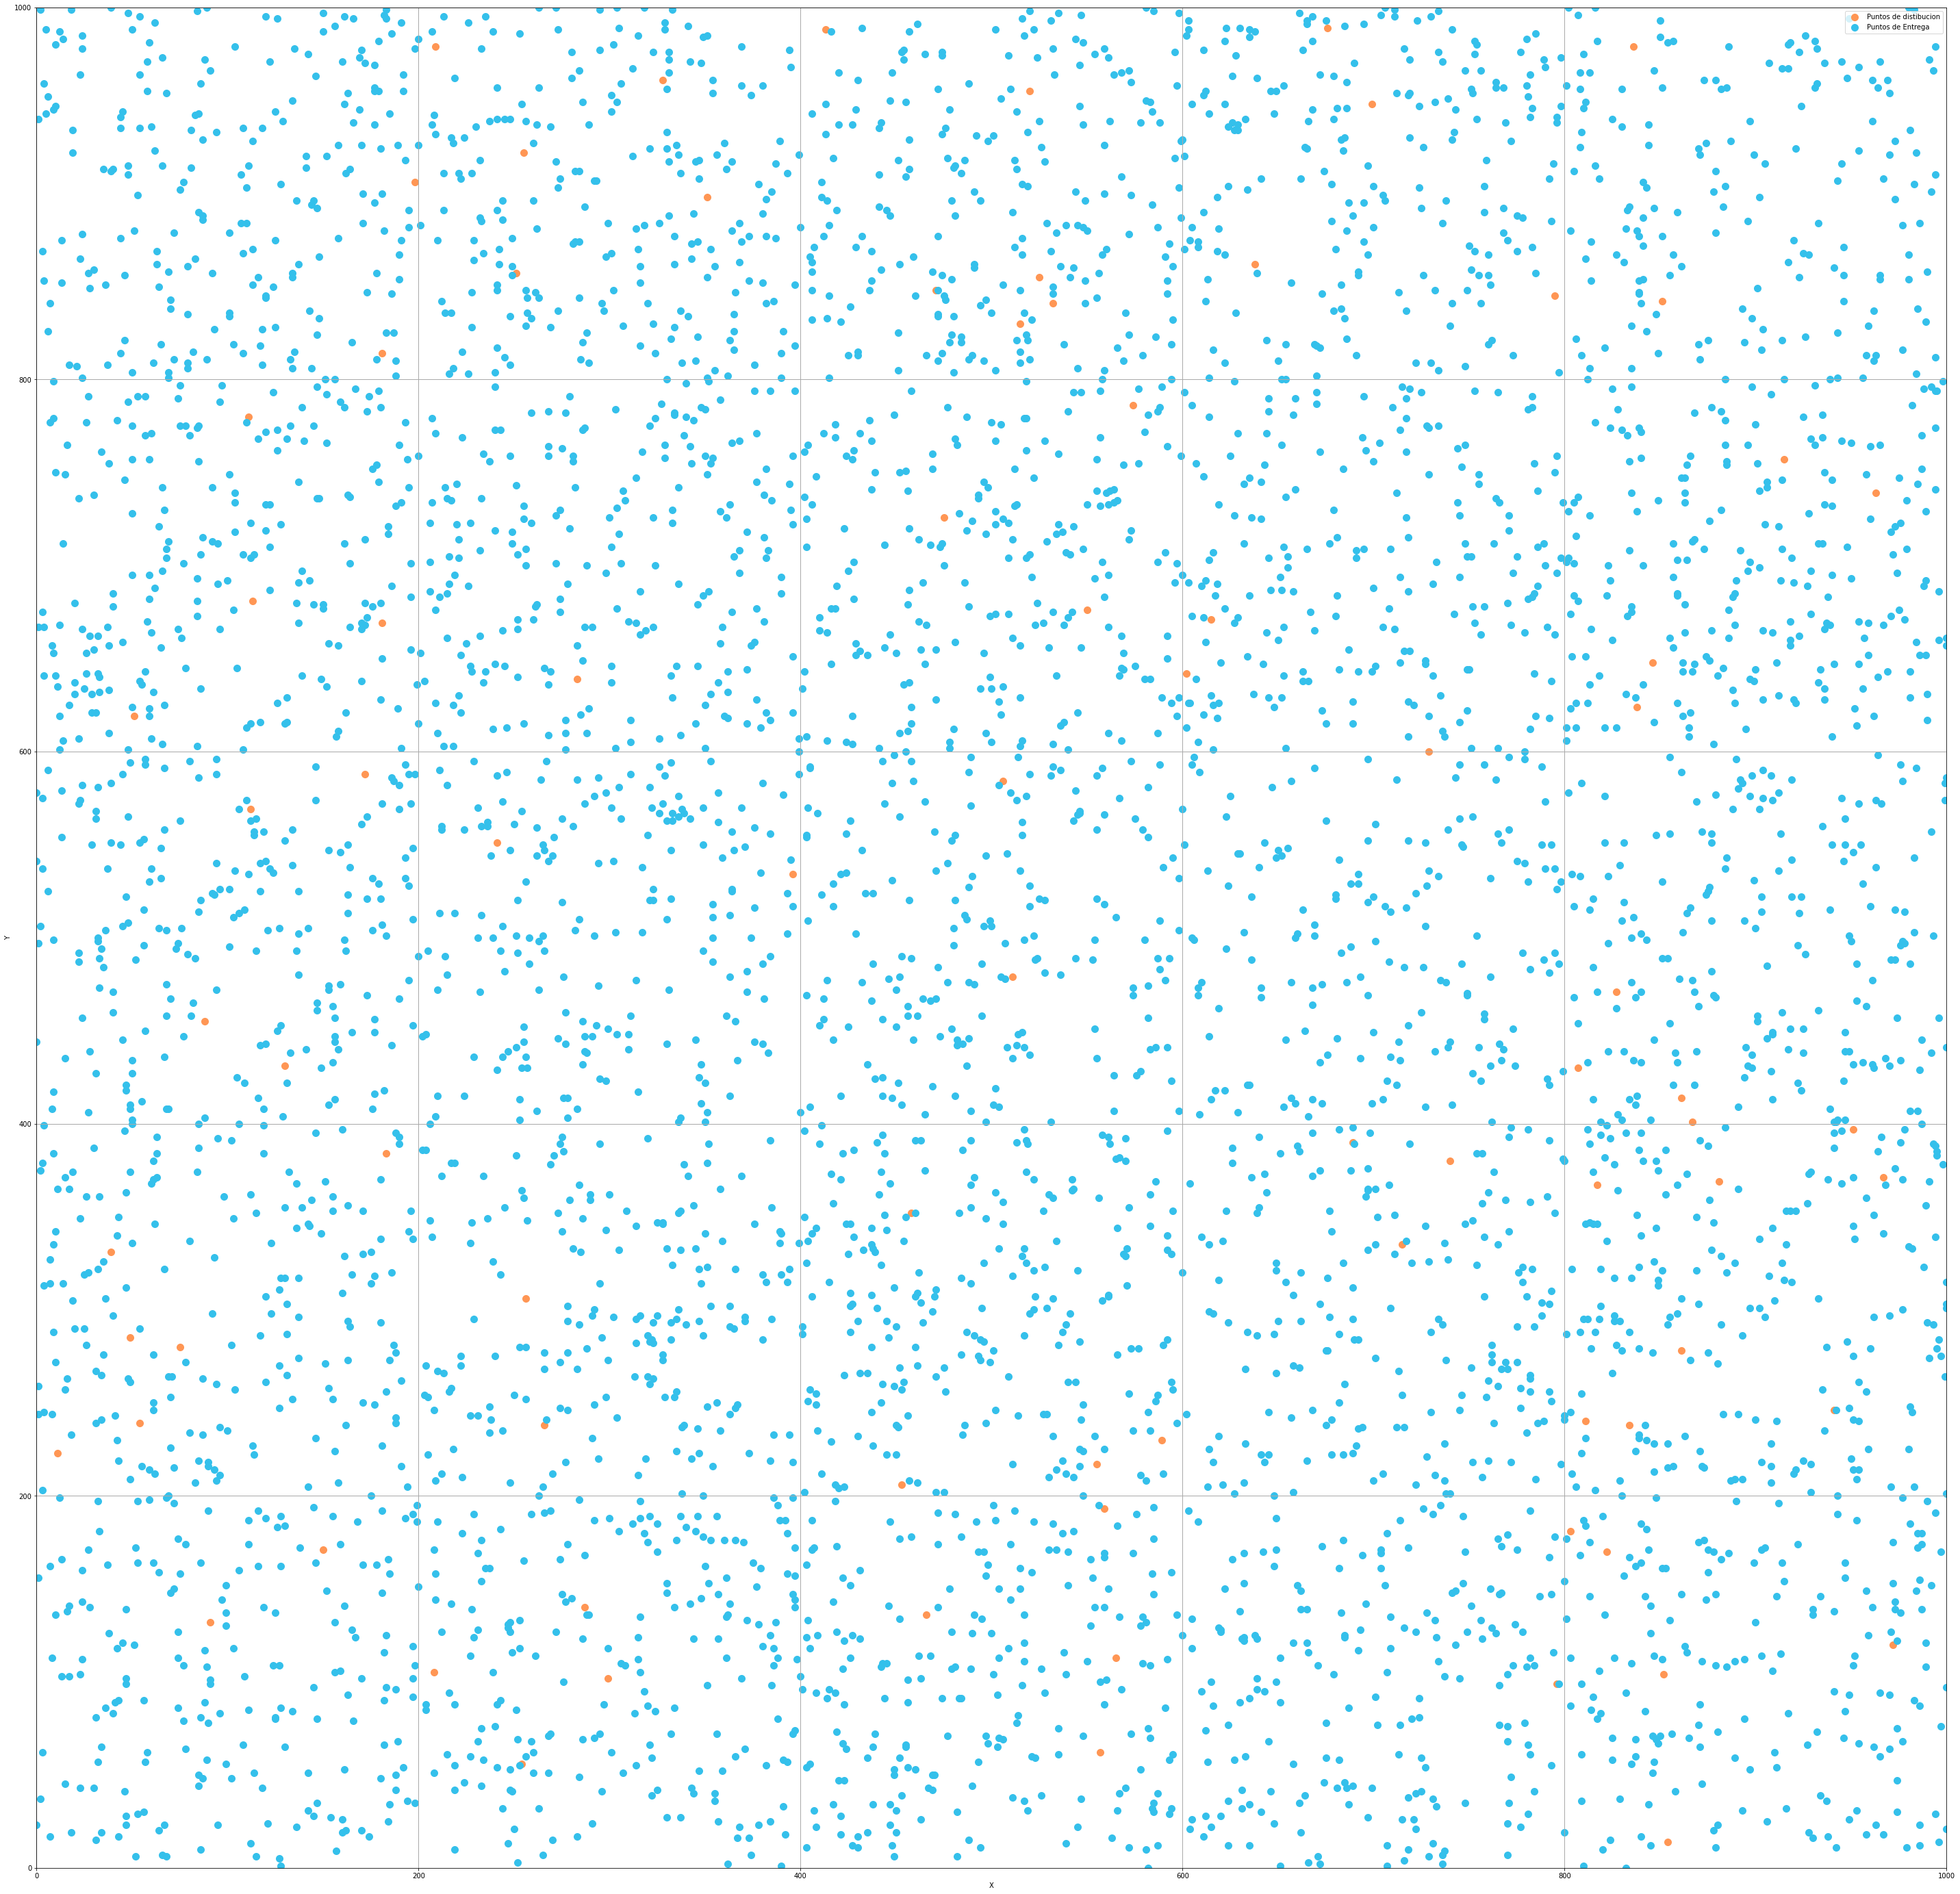

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.grid(color='#AAAAAA', linestyle='-', linewidth=1)
plt.scatter( *zip(*almacenes_xys), s=100, color="#ff9654", label="Puntos de distibucion")
plt.scatter( *zip(*entrega_xys), s=100, color="#34c0eb", label="Puntos de Entrega")
plt.xlabel("X")
plt.ylabel("Y")
for xy in almacenes_xys:
  plt.annotate(None,(xy[0], xy[1]))
for xy in entrega_xys:
  plt.annotate(None,(xy[0], xy[1]))
plt.legend()
plt.xlim([0, side])
plt.ylim([0, side])
plt.show()